<a href="https://colab.research.google.com/github/inayatimachsus/PCVK_Genap_2021/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


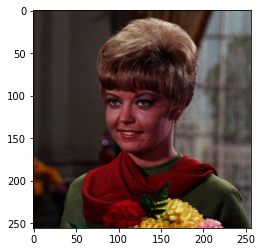

In [4]:
import cv2 as cv 
from google.colab.patches import cv2_imshow 
from skimage import io 
import matplotlib.pyplot as plt 
import numpy as np 

img = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
image = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(image)

 Mengubah tingkat kecerahan citra
---------------------------------
Masukkan nilai kecerahan: 50


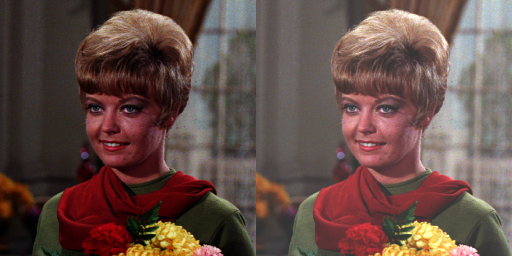

In [6]:
print(' Mengubah tingkat kecerahan citra')
print('---------------------------------')

try:
    brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
    print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

**TUGAS PRAKTIKUM**

 Mengubah kontras dan tingkat kecerahan citra
----------------------------------------------
Masukkan nilai kecerahan [-255 - 255]: 60
Masukan kontras [1.0 - 3.0]: 1.5


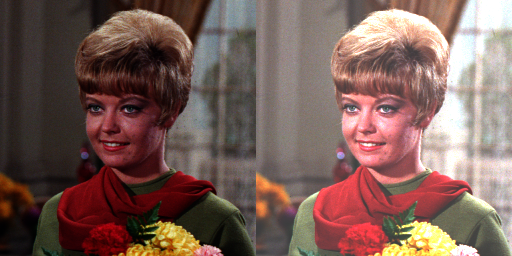

In [7]:
# No 1
print(' Mengubah kontras dan tingkat kecerahan citra')
print('----------------------------------------------')

try:
    brightness = int(input('Masukkan nilai kecerahan [-255 - 255]: '))
    contrast = float(input('Masukan kontras [1.0 - 3.0]: ' ))
except ValueError:
    print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
new_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            new_image[y,x,c] = np.clip(contrast * original[y,x,c] + brightness, -255, 255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, new_image))
cv2_imshow(final_frame)

Mengubah tingkat kecerahan citra dengan Transformasi Log
--------------------------------------------------------
Masukan nilai kecerahan: 40


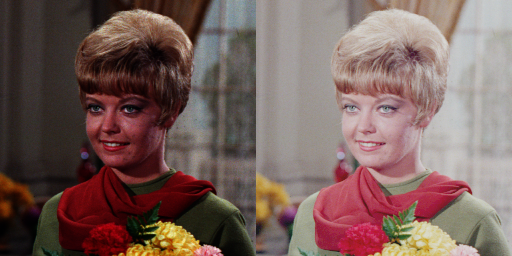

In [9]:
# No 2
print('Mengubah tingkat kecerahan citra dengan Transformasi Log')
print('--------------------------------------------------------')
try:
  brightness = int(input('Masukan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(brightness*(np.log(1.0+original[y,x,c])), -255, 255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta-brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

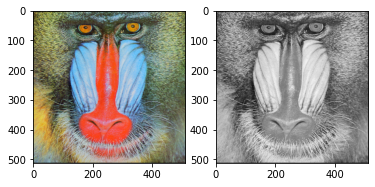

In [10]:
# No 3 bagian a
original = cv.cvtColor(cv.imread('/content/drive/MyDrive/PCVK/Images/mandrill.tiff'), cv.COLOR_BGR2RGB)

gray_img = np.mean(original, axis=2)

f, axarr = plt.subplots(1,2)
axarr[0].imshow(original)
axarr[1].imshow(gray_img, cmap='gray')

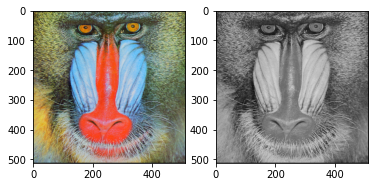

In [13]:
# No 3 bagian b
original = cv.cvtColor(cv.imread('/content/drive/MyDrive/PCVK/Images/mandrill.tiff'), cv.COLOR_BGR2RGB)

gray_img = np.zeros(original.shape, original.dtype)
gray_img[:] = original.mean(axis=-1,keepdims=1)

f, axarr = plt.subplots(1,2)
axarr[0].imshow(original)
axarr[1].imshow(gray_img, cmap='gray')

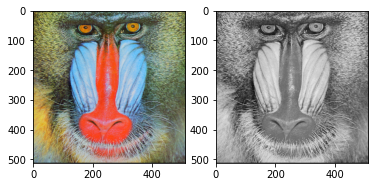

In [17]:
# No 3 bagian c
original = cv.cvtColor(cv.imread('/content/drive/MyDrive/PCVK/Images/mandrill.tiff'), cv.COLOR_BGR2RGB)

R, G, B = original[:,:,0], original[:,:,1],original[:,:,2]
gray_img = (0.21 * R) + (0.72 * G) + (0.07 * B)

f, axarr = plt.subplots(1,2)
axarr[0].imshow(original)
axarr[1].imshow(gray_img, cmap='gray')

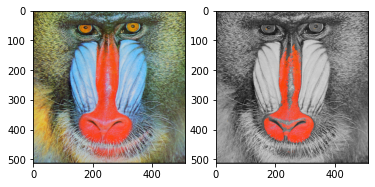

In [29]:
# No 4
original = cv.cvtColor(cv.imread('/content/drive/MyDrive/PCVK/Images/mandrill.tiff'), cv.COLOR_BGR2RGB)
img = cv.imread('/content/drive/MyDrive/PCVK/Images/mandrill.tiff')
finimg = cv.cvtColor(img, cv.COLOR_BGR2RGB)
# creating mask using thresholding over `red` channel (use better use histogram to get threshoding value)
# I have used 200 as thershoding value it can be different for different images
ret, mask = cv.threshold(img[:, :,2], 230, 255, cv.THRESH_BINARY)

mask3 = np.zeros_like(img)
mask3[:, :, 0] = mask
mask3[:, :, 1] = mask
mask3[:, :, 2] = mask

# extracting `red` region using `bitwise_and`
red = cv.bitwise_and(finimg, mask3)
gray = cv.cvtColor(finimg, cv.COLOR_BGR2GRAY)
finimg  = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

# extracting non-red region
gray = cv.bitwise_and(finimg, 255 - mask3)

out = gray + red
f, axarr = plt.subplots(1,2)
axarr[0].imshow(original)
axarr[1].imshow(out)